<a href="https://colab.research.google.com/github/Santiago-Quinteros/EMG_EEG_Analysis/blob/main/EMG_EEG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP  PART 3: EMG - EEG Analysis (Motor Execution)


In this practical you will learn to:

 0. *Simulate* EMG signals , preprocess and analyze them using Neurokit2
 1. Open, analyse and visualise *real* EMG and EEG signals collected during Hand Movement
 2. Identify EMG signal changes with movement
 3. (Advanced) Visualize EEG Event Related Desyncrhonisation (ERD) associated with movements


You will use data of one subject from the following EMG-BCI dataset:

 http://gigadb.org/dataset/view/id/100295

that is also described in detail here:

 Cho, H., Ahn, M., Ahn, S., Kwon, M., & Jun, S. C. (2017). EEG datasets for motor imagery brain–computer interface. GigaScience, 6(7).  

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5493744/pdf/gix034.pdf



##  <span style="background-color:rgba(255, 0, 0, 0.470588)">  (Advanced) Event Related Desyncronization (ERD) </span>

When a movement is performed, a change in the ongoing EMG and EEG activity can be observed. In particular,a decrease or increase in EEG power in given frequency bands can be observed over motor areas.



This change in EEG pattern is called Event Related Desyncronization (ERD) and occurs mainly in $\alpha$ $[8-13]Hz$ and $\beta$ $[14-25]Hz$  bands. It can be estimated with the following formula

$ERD=(PSD_{baseline}-PSD_{motorTask})/(PSD_{baseline})$

with $PSD_{baseline}$ being the EEG Power Spectral Density during the interval preceding the Motor task, and $PSD_{motorTask}$ being the PSD estimated for the Motor Imagery or Motor execution interval.

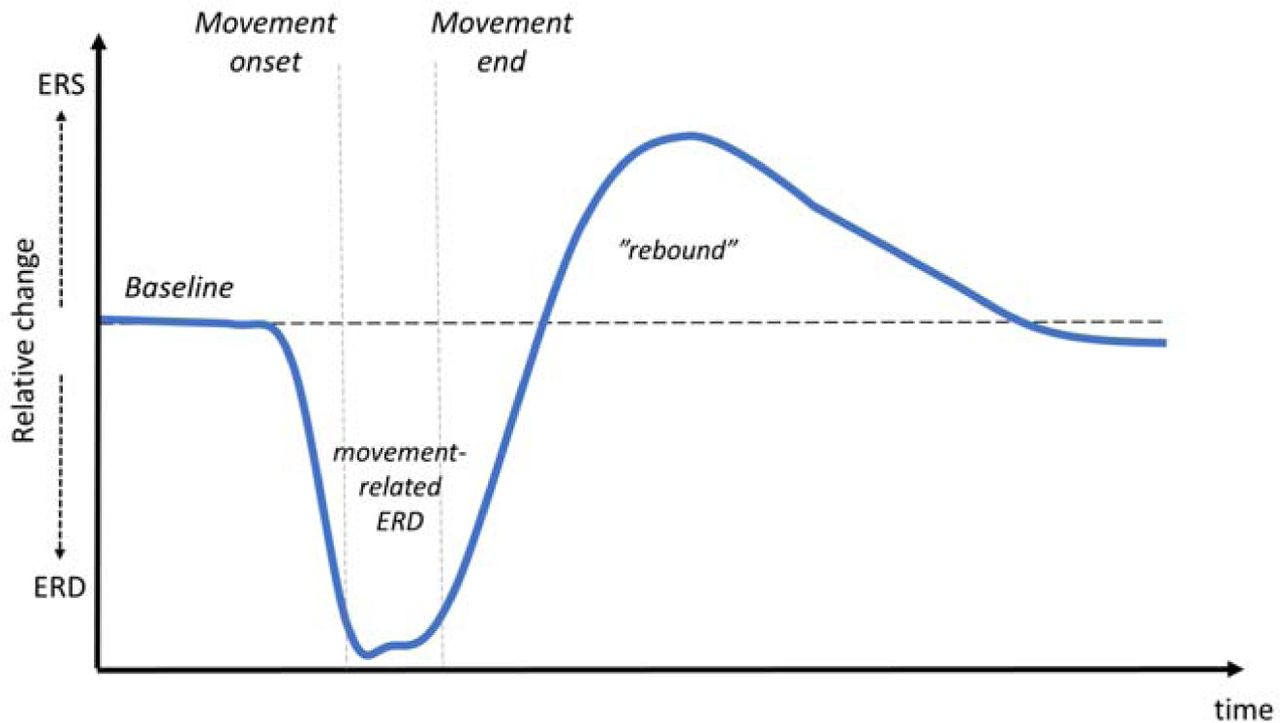


(adapted from Vinding et al, biorxiv 2018)

## Part 1 : EMG signal preprocessing and analysis

In [ ]:
# Install mne and neurokit2 (restart the notebook after running this cell)
!pip install mne
!pip install neurokit2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import packages

%matplotlib inline

from mne.io import read_raw_fif # This is the function to open the raw data
from mne import pick_types  # This is the function select data based on the typeof channel
import matplotlib.pyplot as plt # We also import the plotting functions from matplotlib
import numpy as np
import neurokit2 as nk

 Let's generate a simulated EMG signal, preprocess it and plot the relative muscle activity, using the Neurokit2 package.
 n.b. the preprocessing and emg amplitude calculation is automatically implemented using default parameters: if you want to better understand how this is done, look at the [emg_clean](https://neurokit2.readthedocs.io/en/latest/_modules/neurokit2/emg/emg_clean.html#emg_clean) and [emg_aplitude](https://neurokit2.readthedocs.io/en/latest/_modules/neurokit2/emg/emg_amplitude.html#emg_amplitude)

{'EMG_Onsets': array([ 78, 451]), 'EMG_Offsets': array([ 428, 1156]), 'EMG_Activity': array([  78.,   79.,   80., ..., 1153., 1154., 1155.]), 'sampling_rate': 250}


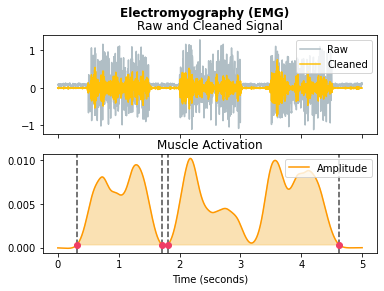

In [ ]:
# PLAY AROUND WITH THE SIMULATION (duration, number of bursts)
# Generate 15 seconds of EMG signal (recorded at 250 samples / second)
emg = nk.emg_simulate(duration=5, sampling_rate=250, burst_number=3)

# Process it
signal, info = nk.emg_process(emg, sampling_rate=250)
print(info)


# Visualise the processing
nk.emg_plot(signal, sampling_rate=250)

Now you will try to extract EMG amplitude (muscle activation) working on real data.  The dataset includes EEG and EMG signals collected during movement of the right hand.

**Q0 (TO BE ANSWERED) what is the sampling frequency, which channels correspond to EMG recordings?**

In [ ]:
# LOAD EEG AND EMG DATA - TO BE COMPLETED (1-0)

filepath_move='sub30_movement_right.fif'
raw=read_raw_fif(filepath_move)
raw.load_data()
print(raw.info)

Opening raw data file sub30_movement_right.fif...
    Range : 0 ... 25599 =      0.000 ...    49.998 secs
Ready.
Reading 0 ... 25599  =      0.000 ...    49.998 secs...
<Info | 11 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 sEEG
 custom_ref_applied: False
 description: bci2011
 dig: 67 items (3 Cardinal, 64 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 68
 projs: []
 sfreq: 512.0 Hz
>


<ipython-input-62-75fb46088c1e>:4: RuntimeWarning: This filename (sub30_movement_right.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw=read_raw_fif(filepath_move)


In [ ]:
# sampling freq - TO BE COMPLETED (1-1)
print('the sample frquency is:',raw.info['sfreq'])

the sample frquency is: 512.0


['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'emg0', 'emg1', 'emg2', 'emg3']


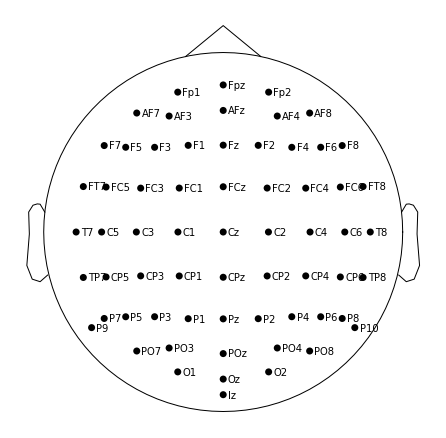

['emg0', 'emg1', 'emg2', 'emg3']


In [ ]:
print(raw.ch_names)
raw.plot_sensors(show_names=True)


# find the emg channels (raw.ch_names= 'emgx') - TO BE COMPLETED (1-1)
# emg channels also correspond to the channel type == 'seeg'

#print(raw.ch_names[-4:])
ls = ['emg','seeg']
emg_channels=[]

for i in range(len(raw.ch_names)):
  if ('emg' or 'seeg') in raw.ch_names[i]:
    emg_channels.append(raw.ch_names[i])
print(emg_channels)




Preprocess eeg and emg data and plot a short segment of the  two signals

In [ ]:
# PICK EMG CHANNELS AND PREPROCESS THEM - TO BE COMPLETED (1-2)

# you need to copy  the raw data as you are going to process them differently for EEG and EMG
raw_copy=raw.copy()
#load data to filter
raw_copy.load_data()

# detrending-remove continuous component from data (high pass filtering f=0.5 Hz)
cutoff=0.5
raw_highpass = raw_copy.filter(l_freq=cutoff, h_freq=None)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 3381 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    0.2s finished


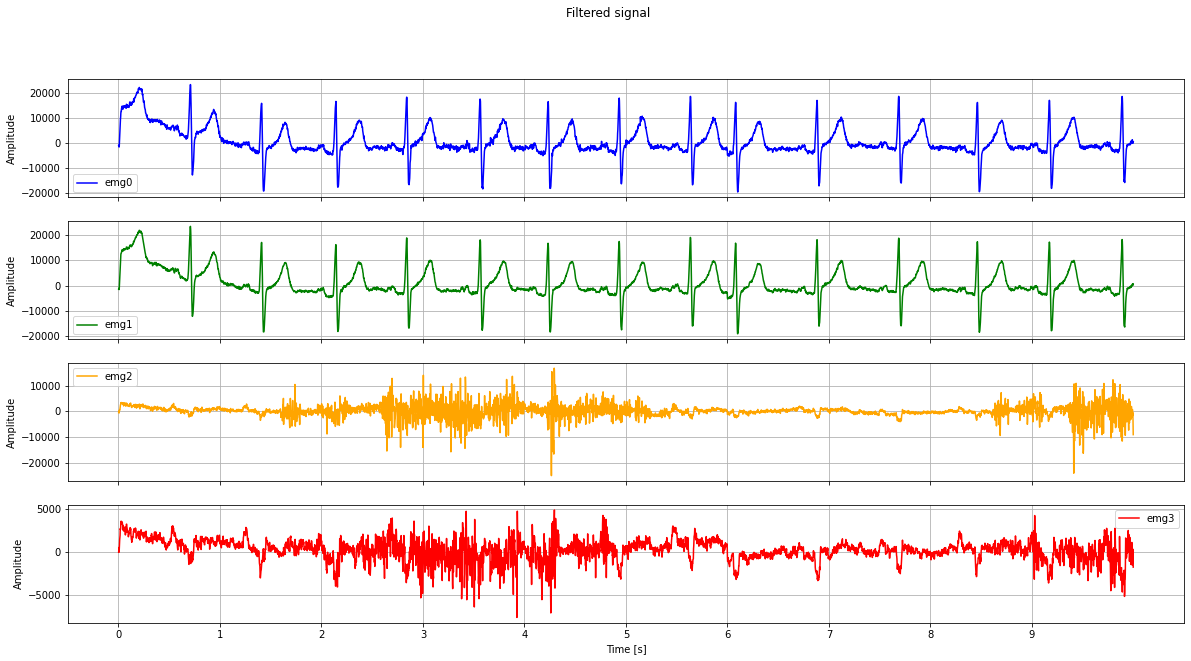

In [ ]:
# PLOT a SEGMENT OF EMG data from  emg electrodes - TO BE COMPLETED (1-3)

#WE COULD USE PICKS FUNCTION INSTEAD OF INDEXES (AS AN ARGUMENT)

emg_array_filt = raw_copy.get_data()
times=(raw_copy.times<10)&(raw_copy.times>0)

lemg0=-4
lemg1=-3
lemg2=-2
lemg3=-1

fig1, ax= plt.subplots(nrows=4, ncols=1,figsize=(20,10),sharex=True, sharey=False)
ax[0].plot(raw_copy.times[times],emg_array_filt[lemg0,times], label="emg0",color='blue')
ax[1].plot(raw_copy.times[times],emg_array_filt[lemg1,times], label="emg1",color='green')
ax[2].plot(raw_copy.times[times],emg_array_filt[lemg2,times], label="emg2",color='orange')
ax[3].plot(raw_copy.times[times],emg_array_filt[lemg3,times], label="emg3",color='red')

for i in range(4):
    ax[i].grid()
    ax[i].legend()
    ax[i].set_ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.suptitle('Filtered signal')
plt.xticks(np.arange(0, 10, 1))
plt.show()



Q1 (TO BE ANSWERED)  By which singnal the EMG signals is strongly "contaminated"?

The signals on the EMG can be contaminated by the ECG signals, because of the proximity of the collection sites to the heart and since the measurement from is the same for both exams. This can be seen as the highest peaks form the ECG coincide with abnormal peaks in EMG.

In [ ]:
# FILTER THE EMG SIGNAL in the [70, 250] Hz BAND TO ISOLATE the EMG signal - TO BE COMPLETED (1-4)
cutoff=70
cuton=250
raw_highpass = raw_copy.filter(l_freq=cutoff, h_freq=cuton)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 70 - 2.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 250.00 Hz
- Upper transition bandwidth: 6.00 Hz (-6 dB cutoff frequency: 253.00 Hz)
- Filter length: 283 samples (0.553 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    0.1s finished


Now plot a longer segment (40 sec) of EMG for the electrode 'emg2' : can you indentify EMG bursts?

Yes,

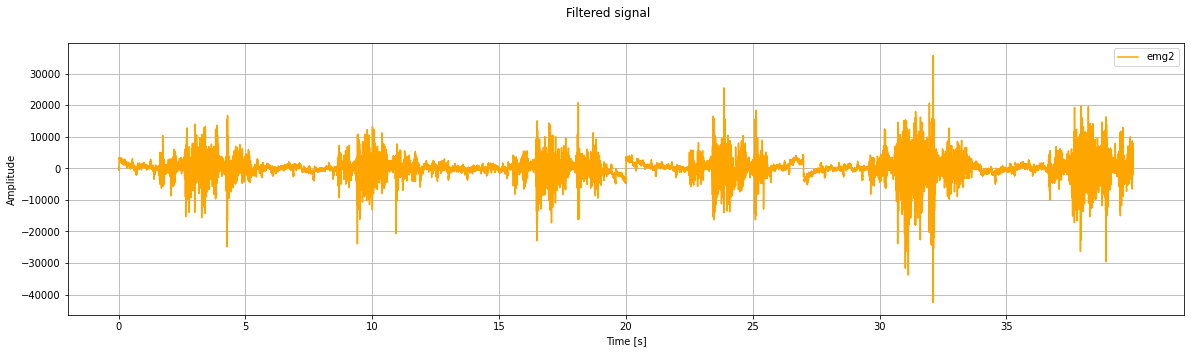

There are 6 EMG bursts clearly distinguishables and the rest periods in between them


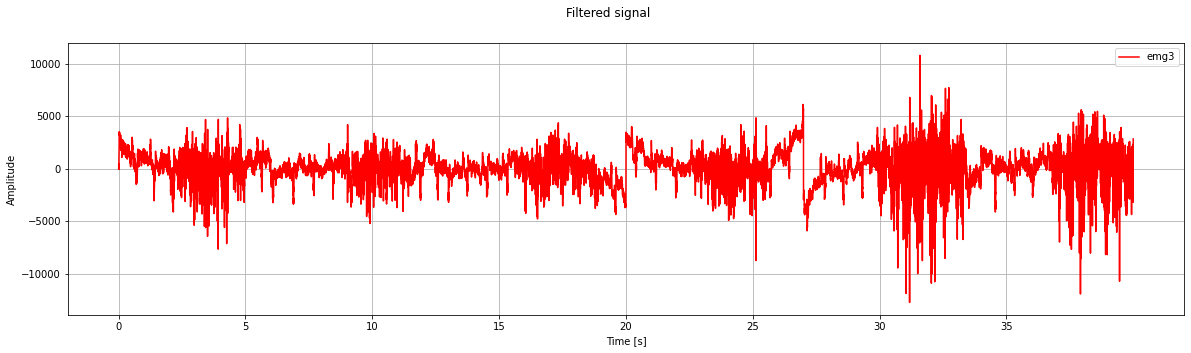

There is still noise in both signals. The first signal has a higher amplitude (3 times bigger than the second one), so its SNR is bigger and the bursts are clearer, but they are distinguisables in both graphs


In [ ]:
# PLOT a 40 s SEGMENT OF EMG data and check the difference between different emg electrodes-TO BE COMPLETED (1-5)

times=(raw_copy.times<40)&(raw_copy.times>0)

plt.figure(figsize=(20, 5))
plt.plot(raw_copy.times[times],emg_array_filt[lemg2,times], label="emg2",color='orange')

plt.grid()
plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.suptitle('Filtered signal')
plt.xticks(np.arange(0, 40, 5))
plt.show()

print('There are 6 EMG bursts clearly distinguishables and the rest periods in between them')

plt.figure(figsize=(20, 5))
plt.plot(raw_copy.times[times],emg_array_filt[lemg3,times], label="emg3",color='red')

plt.grid()
plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.suptitle('Filtered signal')
plt.xticks(np.arange(0, 40, 5))
plt.show()

print('There is still noise in both signals. The first signal has a higher amplitude (3 times bigger than the second one), so its SNR is bigger and the bursts are clearer, but they are distinguisables in both graphs')

Use np.load() to load the array with movements events


In [ ]:
# LOAD EVENTS NUMPY ARRAY - TO BE COMPLETED (1-6)
# np array (n_events,3)
# The first column specifies the sample number of each event,
# the second column is ignored, and the third column provides the event value.

events_move=np.load('s30_movement_events_array.npy')
print(events_move)

[[  511     0     1]
 [ 4095     0     1]
 [ 7679     0     1]
 [11263     0     1]
 [14847     0     1]
 [18431     0     1]
 [22015     0     1]
 [25599     0     1]]


Now plot the first 40 seconds of the emg2 channel and the first 5 events: can you identify a correlation between movement onset and emg burst?

(68, 25600)
68
25600
The bursts comme immediately after the movement onset


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


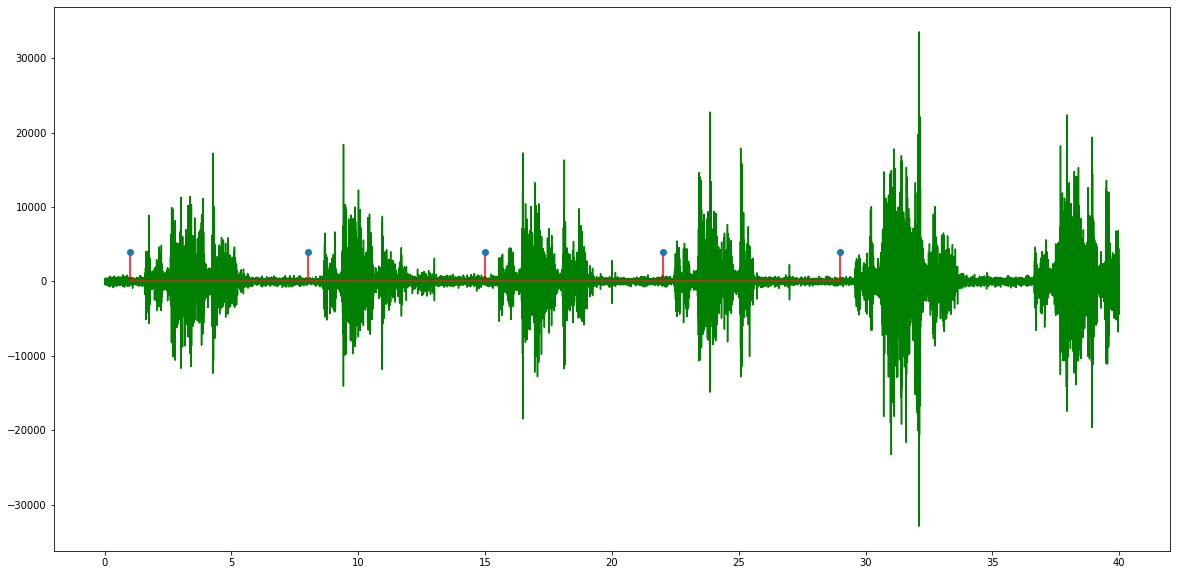

In [ ]:
# PLOT EVENTS and emg2 channels for the first 40 sec - TO BE COMPLETED (1-7)
times_idx=raw.times<=40
num_events=5

x=raw.times[times_idx]

### Create an array emg_array_filt using the previously filtered (for EMG) data structure and the get_data() method
emg_array_filt = raw_copy.get_data()
print(emg_array_filt.shape)
print(len(raw.ch_names))
print(len(raw.times))

### emg_array_filt should be of shape (electrodes,time),
### so to do the following plot you need to select just one electrode of emg_array_filt
### corresponding to an EMG electrode

elecnum = lemg2

plt.figure(figsize=(20,10))
plt.plot(x,emg_array_filt[elecnum,0:len(x)],'g')
plt.stem(raw.times[events_move[0:num_events,0]],4000*np.ones_like(events_move[0:num_events,0]),'r')

print('The bursts comme immediately after the movement onset')

In [ ]:
# CORRELATION BETWEEN MOVEMENT ONSET AND EMG SIGNAL (Hilbert transform)
# Use the mne function apply_hilbert: if envelope=True, the absolute value of the analytic signal for the channels defined in picks is computed, resulting in the envelope signal.

raw_copy.apply_hilbert(picks=[lemg2],envelope=True)


<Raw | sub30_movement_right.fif, 68 x 25600 (50.0 s), ~13.4 MB, data loaded>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

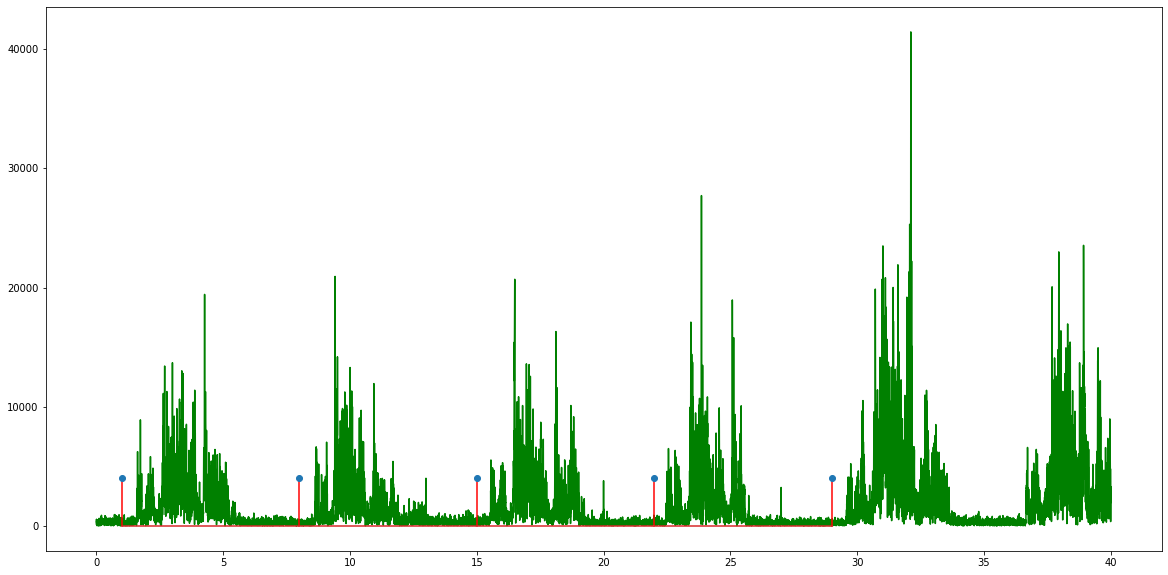

In [ ]:
# PLOT EMG signal envelope with the movements onsets - TO BE COMPLETED (1-8)
emg_array_filt = raw_copy.get_data()
plt.figure(figsize=(20,10))
plt.plot(x,emg_array_filt[elecnum,0:len(x)],'g')
plt.stem(raw.times[events_move[0:num_events,0]],4000*np.ones_like(events_move[0:num_events,0]),'r')

## <span style="background-color:rgba(255, 0, 0, 0.470588)"> Part 2 (Advanced)Visualize EEG Power Spectral Density during movement<span>



Here you will start analyising the EEG signal during movement, exploiting the events vector to extract some average statistics across epochs.

See [here](https://mne.tools/stable/generated/mne.Epochs.html) for details on how to use the raw data and the events vector with MNE.

In [ ]:
eeg=raw.pick_types(eeg=True)

eeg_filt=eeg.copy()


# Filter EEG data (see previous TP)
eeg_filt.filter(0.2,40)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 8449 samples (16.502 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.2s finished


<Raw | sub30_movement_right.fif, 64 x 25600 (50.0 s), ~12.6 MB, data loaded>